In [1]:
!pip install transformers -q
!pip install sentencepiece -q

In [2]:
import pandas as pd
from transformers import AutoModel, AutoTokenizer

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/mp3_data_w_vectors.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
data['iGenre'] = data.apply(lambda x:int(x.Genre=='Devotional'),axis=1)

In [4]:
gpu = torch.device("cuda")
cpu = torch.device("cpu")

In [5]:
xlmr_model = AutoModel.from_pretrained("xlm-roberta-base")
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
for param in xlmr_model.parameters(): 
  param.requires_grad = True

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [6]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=25)

In [7]:
txt_results = k_fold_model_preparation(xlmr_model, gpu, False, data, sequences, attention_masks, targets,
                                       k_folds=5, epochs=5, balance_classes=False)

Running Text Only Classification
FOLD 0
--------------------------------

 Epoch 1 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.653
Validation Loss: 0.633

 Epoch 2 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.608
Validation Loss: 0.579

 Epoch 3 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.563
Validation Loss: 0.601

 Epoch 4 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.532
Validation Loss: 0.613

 Epoch 5 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.497
Validation Loss: 0.640
On Train Data
              precision    recall  f1-score   support

           0       0.37      0.04      0.08       296
           1       0.66      0.96      0.79       581

    accuracy                           0.65       877
   macro avg   

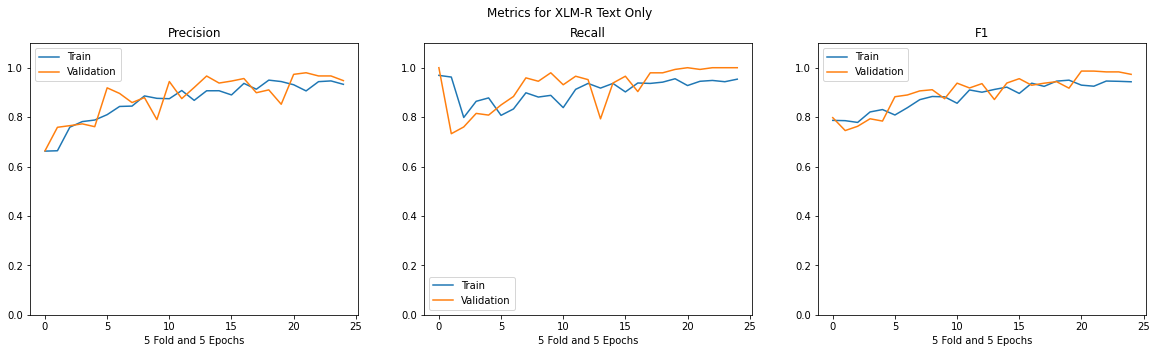

In [8]:
plot_results(txt_results,'XLM-R Text Only')

In [9]:
fusion_results = k_fold_model_preparation(xlmr_model, gpu, True, data, sequences, attention_masks, targets,
                             k_folds=5, epochs=5, balance_classes=False)

Running Fusion Model
FOLD 0
--------------------------------

 Epoch 1 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.615
Validation Loss: 0.500

 Epoch 2 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.436
Validation Loss: 0.310

 Epoch 3 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.268
Validation Loss: 0.203

 Epoch 4 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.178
Validation Loss: 0.207

 Epoch 5 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.170
Validation Loss: 0.237
On Train Data
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       296
           1       0.95      0.98      0.96       581

    accuracy                           0.95       877
   macro avg       0.95    

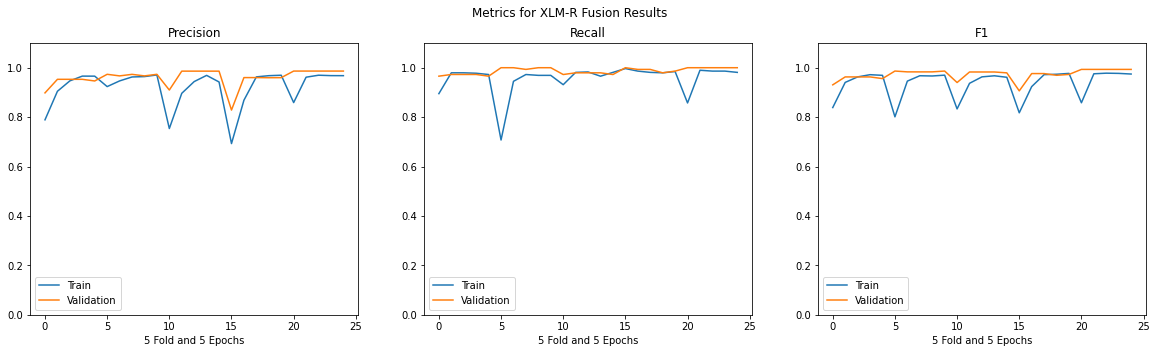

In [10]:
plot_results(fusion_results,'XLM-R Fusion Results')